# Vous pouvez trouver le dataset dans kaggle 
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

# Quelque importations

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib


# Lecture du csv

In [71]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Consultation et nettoyage du dataset

In [63]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [64]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [65]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [66]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1


# Preparation pour la classification

In [67]:
# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
# Define features and target
X = df.drop(columns=['stroke', 'id'])
y = df['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.893237,2,1


# Decision Tree classifieur

In [69]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Accuracy: 0.8988910632746249
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.18      0.20      0.19        89

    accuracy                           0.90      1533
   macro avg       0.56      0.57      0.57      1533
weighted avg       0.91      0.90      0.90      1533



# Random forest classifieur avec matrice de confusion

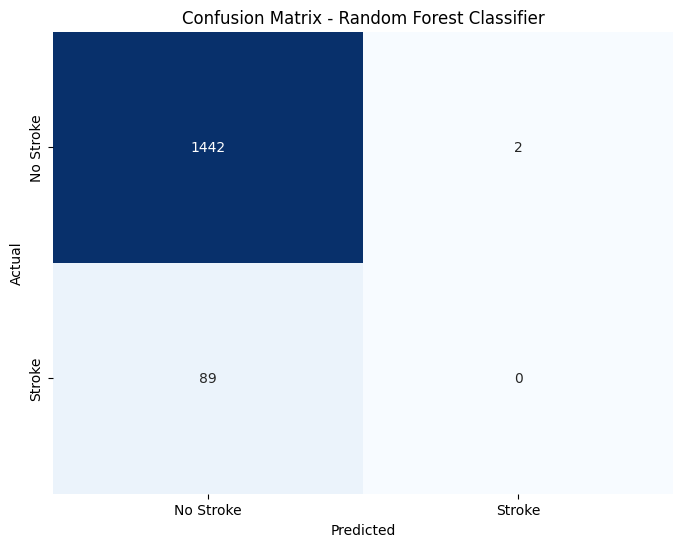

Accuracy: 0.9406392694063926
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



In [70]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Predictions
y_pred_rf = rf.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Sauvegarde du modèle, du scaler et des encodeurs

In [76]:
# Initialize LabelEncoders for each categorical variable
le_gender = LabelEncoder()
le_ever_married = LabelEncoder()
le_work_type = LabelEncoder()
le_residence_type = LabelEncoder()
le_smoking_status = LabelEncoder()

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Encode categorical variables
df['gender'] = le_gender.fit_transform(df['gender'])
df['ever_married'] = le_ever_married.fit_transform(df['ever_married'])
df['work_type'] = le_work_type.fit_transform(df['work_type'])
df['Residence_type'] = le_residence_type.fit_transform(df['Residence_type'])
df['smoking_status'] = le_smoking_status.fit_transform(df['smoking_status'])

# Define features and target
X = df.drop(columns=['stroke', 'id'])
y = df['stroke']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Save model and preprocessing objects
joblib.dump(rf, 'random_forest_stroke_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_gender, 'le_gender.pkl')
joblib.dump(le_ever_married, 'le_ever_married.pkl')
joblib.dump(le_work_type, 'le_work_type.pkl')
joblib.dump(le_residence_type, 'le_residence_type.pkl')
joblib.dump(le_smoking_status, 'le_smoking_status.pkl')


['le_smoking_status.pkl']